In [1]:
!pip install sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
bmi = pd.read_csv("bmi_500.csv", index_col = 'Label')
bmi

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


#### 명목척도로 인코딩하기(남자 1, 여자 0)

In [3]:
gender = []
for i in bmi['Gender']:
    if i == "Male":
        gender.append(1)
    else:
        gender.append(0)
bmi["Gender"] = gender
bmi

,Gender,Height,Weight
Label,,,
Obesity,1,174,96
Normal,1,189,87
Obesity,0,185,110
Overweight,0,195,104
Overweight,1,149,61
...,...,...,...
Extreme Obesity,0,150,153
Obesity,0,184,121
Extreme Obesity,0,141,136


In [4]:
bmi.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

In [5]:
bmi = pd.read_csv('bmi_500.csv', index_col='Label')
# 산점도를 표시하는 함수를 만들어보자~!
def myScatter(label, color) :
    # 원하는 레이블값을 인덱싱
    tmp = bmi.loc[label]
    # scatter : 산점도로 표시하는 명령
    plt.scatter(tmp['Weight'],     # x축 데이터 설정
                tmp['Height'],     # y축 데이터 설정
                c = color,         # 색상을 결정하는 명령
                label = label      # label로 설정하는 명령
                )

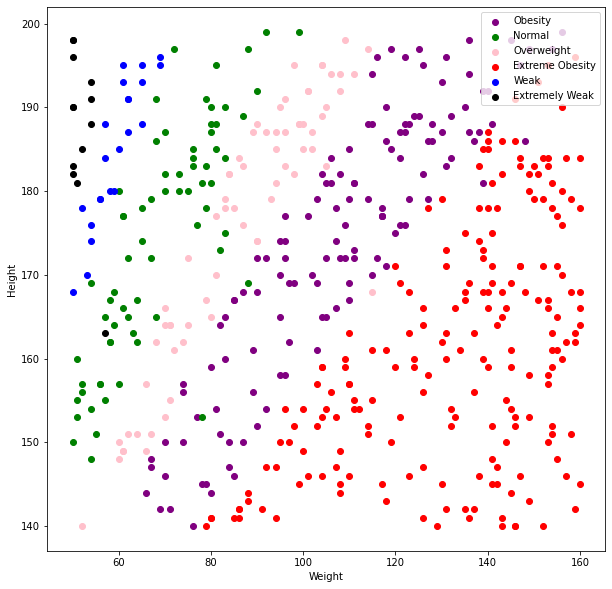

In [7]:
plt.figure(figsize=(10,10))

myScatter("Obesity","purple")
myScatter("Normal","green")
myScatter("Overweight","pink")
myScatter("Extreme Obesity","red")
myScatter("Weak","blue")
myScatter("Extremely Weak","black")

plt.legend(loc="upper right")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

#### 머신러닝 코드 짜기

In [6]:
bmi = pd.read_csv('bmi_500.csv')
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [7]:
gender = []
for i in bmi['Gender']:
    if i == "Male":
        gender.append(1)
    else:
        gender.append(0)
bmi["Gender"] = gender
bmi

,Gender,Height,Weight,Label
0,1,174,96,Obesity
1,1,189,87,Normal
2,0,185,110,Obesity
3,0,195,104,Overweight
4,1,149,61,Overweight
...,...,...,...,...
495,0,150,153,Extreme Obesity
496,0,184,121,Obesity
497,0,141,136,Extreme Obesity
498,1,150,95,Extreme Obesity


#### 독립변수와 종속변수 구분하기

In [8]:
x = bmi.loc[:,"Height":"Weight"]
y = bmi.loc[:,"Label"]

In [12]:
print(x.shape)
print(y.shape)

(500, 2)
(500,)


#### Train-Test Split

In [11]:
x_train=x.iloc[:350,:]
y_train=y.iloc[:350]

x_test=x.iloc[350:,:]
y_test=y.iloc[350:]

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(350, 2)
(350,)
(150, 2)
(150,)


In [21]:
model = KNeighborsClassifier(n_neighbors= 10)
#model = DecisionTreeClassifier()

In [22]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [23]:
prediction = model.predict(x_test)
prediction

array(['Normal', 'Normal', 'Normal', 'Extreme Obesity', 'Extremely Weak',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Weak', 'Extreme Obesity',
       'Weak', 'Extreme Obesity', 'Extreme Obesity', 'Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Overweight', 'Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Normal', 'Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Overweight',
       'Extreme Obesity', 'Weak', 'Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Obesity',
       'Overweight', 'Normal', 'Normal', 'Normal', 'Normal', 'Overweight',
       'Extreme Obesity', 'Overweight', 'Overweight', 'Extreme Obesity',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Obesity', 'Normal',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Normal',
       'Extreme Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Weak',
       'Obesity', 'Extreme Obes

In [24]:
metrics.accuracy_score(prediction, y_test)

0.94